# TATR: General Inquirer Category

This notebook is part of a greater series of Juypter Notebooks structured around Twitter Tweet analysis. This particular notebook will look at categorizing text using the General Inquirer Categories released by Harvard (http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm). This notebook will showcase how to break down the General Inquirer Category into a dictionary and how it can be tailored to fit your needs.

Any additional assumptions and clarification will be discussed and declared throughout the notebook.

### Note: 
This notebook will use concepts found in the TATR notebook series

Written 2018.

In [1]:
# Importing data structure libraries
import pandas as pd
import numpy as np

# Importing CSV library
import csv

# Import graphing tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that any graphs produced appears in the notebook (Vital)
%matplotlib inline

# General Inquirer Category

In this notebook we will count all the categories that each word belongs to. Therefore, this notebook mimics the functionalities of LIWC (Lingustic Inquiry Word Count). This type of analysis pairs words with different categories (Postive, Negative, etc) and counts how many times a text fits into them. We will begin the notebook by importing the categories and then changing them into a form we can run on a Panda dataframe.

This requires a dictionary of words and categories. These can be found here 
http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm

With the dictionary and the token count (or word count) we can divide the number found in a particular category and the total token count of the tweet to get a percentage.

## Note / Disclaimer:
In the attempt to simplify the code and complexity this notebook has made some assumptions. This will be explained when it appears in the code

To begin we will need to load in the categories taken from Harvard. This can be done by opening the CSV and saving it into a variable.

In [2]:
# The csv name of the inquirer dictionary
csvFile = "inquirerbasic.csv"

# Create a list of rows to hold the values
listOfRows = []

# Reading the csv 
with open(csvFile, 'r') as file: # This makes sure that file is closed after reading
    data = csv.reader(file)
    
    # For every row in the file save it
    for row in data:
        listOfRows.append(row)

# Close the file after we finish loading it
file.closed

True

## Declaring Categories

Now that we have finshed loading in the file we can create the categories. However, we are not going to use every column taken from the CSV. This is because upon examination of the CSV you can see that there are additional columns used to explain the word definition. Therefore, we can ignore these categories. 

If you would like to keep particular categories feel free to modify the code below to include them.

In [3]:
# Format the category
categories = listOfRows[0]

# We do not need the first 2 categories (they have the word, and the source of it)
# The last two columns are descriptions of the words in question. We also do not need that
# Note the csv also has an additional 4 empty columns at the end (that is why we have -6)
categories = categories[2:len(categories)-6]

# Check how many categories
print("Length of category " + str(len(categories)))

# Print out the first 5 categories to check and see if we have done it correctly
print(categories[:5])

Length of category 182
['Positiv', 'Negativ', 'Pstv', 'Affil', 'Ngtv']


## Helper Functions Categories

In this next part we are going to define a few functions to help with our analysis. However, only one will be used for the lamda function. The reason for the different functions is to create more understandable / module code.


### Note / Disclaimer:
It is in this section where modification and alteration are done. Therefore, any changes you do or do not want to be included in the analysis can be done here. 

The biggest thing to note is that in the original categories it is not uncommon that each word has multiple meanings and use in different contexts. This means that for each version of a word they can belong to different categories. In the CSV it explains more on the word use and definition. It is possible that in one tweet the noun version is used compared to another where the verb version is used. 

This notebook however collapses all the versions into one singular category that contains all the categories of all the different versions. This will reduce the accuracy of the results. This could be fixed by using nltk (Natural Language Toolkit) to categorize each word token as a noun and writing additional functions that match this alongside the correct definition of the word in the CSV. However, it would make this notebook even more complex than it already is. Therefore, this notebook does not explore that option.

In [4]:
"""
Set all the categories of a word into a set if that word did not exist already

:row: entry in the CSV
"""
def new_attribute_set(row):
    # The reason for a set because it is faster to laod
    attributeSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            attributeSet.add(element)
    return attributeSet;

"""
# Combine all matching words into one larger set

row: entry in the CSV
"""
def combine_attribute_set(row, oldset):
    # The reason for a set because it is faster to laod
    newSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            newSet.add(element)
    
    # Return a new updated set without duplicates
    return (oldset | newSet)

"""
Assign every word with the categories (in a set)

row: entry in the CSV
"""
def get_dictionary_list(listOfRows,categories):
    returnDict = {}

    # For every row create the set of categories that belong to it
    for row in listOfRows:
        
        # Reduce the word to the base. This is because the csv has LOVE#1, LOVE#2 to symbolize different meanings
        # In this anaylsis we are going to collapse them together
        word = row[0].split("#", 1)[0]
    
        # Check to see if the word is in the dictionary already
        if word in returnDict:
            returnDict[word] = combine_attribute_set(row[2:len(categories)-2], returnDict[word])
        else:
            returnDict[word] = new_attribute_set(row[2:len(categories)-2])
        
    return returnDict

"""
Creates the columns we need and fills them with how many of each categories the text belongs to

dataframe: dataframe containing the data
column:    the column with the token
"""
def update_values_category(dataframe, column):
    # Finds and counts all the categories it belongs to
    resultDictionary = find_category(dataframe[column])
    # Iterate through the results
    for k, v in resultDictionary.items():
        # Create columns for every category
        dataframe[k] = v
    return dataframe

"""
Looks through the tokens and increments the appropriate categories that it belongs to

token:    A list of tokens
"""
def find_category(tokens):
    # Set all categories to 0 as default
    Categories = {el:0 for el in categories}
    # Iterate through all tokens
    for element in tokens:
        # If it exists, increment the value
        if element.upper() in dictWords:
            inside = dictWords[element.upper()]
    
            # Increment the category
            for element in inside:
                Categories[element] += 1
    
    return Categories

Now that we have declared all the helper functions we can intialize the categories. 

In [5]:
# Create dictionary of words and which category they belong to
# [1:] ignores the index
dictWords = get_dictionary_list(listOfRows[1:], categories)

# Have a look at the dictionary
dictWords

{'ABIDE': {'Active', 'Affil', 'Doctrin', 'IAV', 'Positiv'},
 'ABILITY': {'ABS', 'Abs@', 'EVAL', 'MeansLw', 'Positiv', 'Strong', 'Virtue'},
 'ABLE': {'EVAL', 'MeansLw', 'Positiv', 'Pstv', 'Strong', 'Virtue'},
 'ABOUND': {'IAV', 'Increas', 'Passive', 'Positiv'},
 'ABSOLVE': {'Active', 'ComForm', 'IAV', 'Positiv', 'SocRel'},
 'ABSORBENT': {'Increas', 'IndAdj', 'Positiv'},
 'ABSORPTION': {'Affil', 'Increas', 'Positiv'},
 'ABUNDANCE': {'ECON',
  'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ABUNDANT': {'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ACCEDE': {'Active',
  'Affil',
  'ComForm',
  'IAV',
  'Positiv',
  'PowGain',
  'PowTot'},
 'ACCENTUATE': {'Active', 'IAV', 'Ovrst', 'Positiv'},
 'ACCEPT': {'IAV', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel', 'Submit'},
 'ACCEPTABLE': {'EVAL', 'PosAff', 'Positiv', 'Pstv', 'Virtue'},
 'ACCEPTANCE': {'Affil', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel'},
 'ACCESSIBLE': 

As you can see each word is associated with multiple different categories. However, you may be wondering why is it that the categories formatted in a particular way. The underlying reason for their use is due to performance. Sets provide better performance over their list counter parts. This is because sets are unordered and therefore it does not keep track of the position each element is at. For this notebook we do not care about the order in which the categories are listed in, rather we are more concerned with what categories it belongs to. Therefore, we can use set over list when storing what categories each word belongs to. The same with using dictionaries, as they provide better look up (search) time. This may make them the ideal data structure when searching for words.

For a smaller dataset this might not matter as much, however with larger datasets this can greatly reduce the computation time.

## Dummy Data

Similar to the other notebooks we are going to create some dummy data to ensure everyone who uses this notebook can try it out. This dummy data will require 2 components. The first being a list of tokens, and the second being the token count. The reason for this is we are going to record the count of each category and calculate the percentage from the total amount. 

To create the "dummy tweet text" we will randomly choose a subset from the set of terms found in the General Inquirer Category. 

In [6]:
# Setup empty dataframe
DummyDataframe = pd.DataFrame(columns=['Date', 'Tokens', 'Token_Count'])

# Setup 3 different dates
dummyDates = [ pd.Timestamp('20180101'),  pd.Timestamp('20180201'),  pd.Timestamp('20180301')]

dummyTerms = list(dictWords.keys())

# Create 25 entries and assign a random amount of words between 0-15 and choose randomly from the list
for i in range(25):
    dummyText =  [dummyTerms[np.random.randint(8641)] for x in range(np.random.randint(186))]
    DummyDataframe.loc[i] = [dummyDates[i % 3],  dummyText, len(dummyText) ]
    
# See what the dataframe looks like
DummyDataframe

,Date,Tokens,Token_Count
0,2018-01-01,"[FURNISH, ASSURANCE, ANIMATE, WRITTEN, SANGUIN...",90
1,2018-02-01,"[COAX, SELF-DETERMINATION, SIGNATURE, IMPERATI...",139
2,2018-03-01,"[PROVINCE, LAZY, SILLY, AMID, FUSS, BEWARE, RO...",143
3,2018-01-01,"[DROWN, THURSDAY, AMBUSH, SOVEREIGN, MUTTER, M...",152
4,2018-02-01,"[ELECTRIC, DISAPPROVAL, PARANOID, SUN, UTOPIAN...",171
5,2018-03-01,"[BALANCE, CRAFT, LOCATE, HEARD, DEAFNESS, STRA...",39
6,2018-01-01,"[GENEVA, GEAR, NUMEROUS, MATE, WRESTLE, SOUTH-...",15
7,2018-02-01,"[IDOLIZE, SQUARELY, WIN, AMBIVALENT, HISTORIC,...",125
8,2018-03-01,"[LIKABLE, UNDUE, THERAPEUTIC, CARELESSNESS, IM...",32
9,2018-01-01,"[INDONESIA, POLICE, JOINER, LOUD, CHANGE, UNCH...",42


## Counting the Categories

Now that we created some dummy data to work with we are going to apply our functions that we declared eariler. The first thing we are going to do is count the occurrence of each category and set the index to date. Depending on the size of your corpus this may take a long time, therefore it might be better to segment your data into smaller chunks.

In [7]:
# Set index to Date
DummyDataframe = DummyDataframe.set_index("Date")

# Apply the count function
DummyDataframe = DummyDataframe.apply(lambda x: update_values_category(x, "Tokens"), axis=1)

# Seeing what DummyDataframe look like
DummyDataframe

,Tokens,Token_Count,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,"[FURNISH, ASSURANCE, ANIMATE, WRITTEN, SANGUIN...",90,19,20,8,4,10,5,16,8,...,0,0,0,2,3,0,0,0,0,0
2018-02-01,"[COAX, SELF-DETERMINATION, SIGNATURE, IMPERATI...",139,25,28,10,8,10,4,20,13,...,1,5,0,2,0,0,0,0,0,0
2018-03-01,"[PROVINCE, LAZY, SILLY, AMID, FUSS, BEWARE, RO...",143,30,36,16,9,9,8,21,9,...,1,2,0,1,0,2,0,0,0,0
2018-01-01,"[DROWN, THURSDAY, AMBUSH, SOVEREIGN, MUTTER, M...",152,30,33,16,10,9,15,25,16,...,1,3,0,1,4,1,0,0,0,0
2018-02-01,"[ELECTRIC, DISAPPROVAL, PARANOID, SUN, UTOPIAN...",171,36,45,21,13,19,23,34,12,...,1,1,0,4,4,1,0,0,0,0
2018-03-01,"[BALANCE, CRAFT, LOCATE, HEARD, DEAFNESS, STRA...",39,8,10,4,4,5,0,5,3,...,0,0,0,1,0,0,0,0,0,0
2018-01-01,"[GENEVA, GEAR, NUMEROUS, MATE, WRESTLE, SOUTH-...",15,2,2,1,2,0,1,2,0,...,0,0,0,0,0,1,0,0,0,0
2018-02-01,"[IDOLIZE, SQUARELY, WIN, AMBIVALENT, HISTORIC,...",125,23,26,12,6,13,10,25,9,...,3,4,0,2,0,2,0,0,0,0
2018-03-01,"[LIKABLE, UNDUE, THERAPEUTIC, CARELESSNESS, IM...",32,7,9,2,1,3,0,3,2,...,0,0,1,1,0,0,0,0,0,0


As you can see we now have the count of what categories each token belong to. Now we can plot this information using the graphing function from TATR: Graphing. 

In [8]:
"""
Plot one of the column of a dataframe

:column        = Columns to be used for the data
:title         = The title of the graph
:date          = The index with the dates (in y-m-d format)
:dataframe     = The dataframe of the data
:intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
:saveImage     = True to save image, false to skip
:fileName      = Name of the save file
"""
def basic_plot_generator(column, title, date, dataframe, intervalValue = 1, saveImage=False, fileName = None):
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")

    # Create subplot of Tweet Count over time using the default 1 month interval
    ax.plot(pd.to_datetime(date), dataframe[column], label=column)

    # Set the interval to be the default 1 month 
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=intervalValue))
    
    # Set the date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Calculate the average
    countMean = [dataframe[column].mean()]*len(pd.to_datetime(date))
    mean_line = ax.plot(pd.to_datetime(date),countMean, label='Average Overall Count', linestyle='--')

    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

"""
Plot different columns against eachother over time

:column        = Columns to be used for the data
:title    = Name of the column used
:date          = The index with the dates (in y-m-d format)
:dataframe     = The dataframe of the data
:intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
:saveImage     = True to save image, false to skip
:fileName      = Name of the save file
"""
def plot_compare_generator(column, title, date, dataframe, intervalValue = 1, saveImage=False, fileName = None):
    
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()
    
    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")
    
    for element in column:
        # Create subplot of Tweet Count over time using a 3 month interval
        ax.plot(pd.to_datetime(date), dataframe[element], label=element)
        
    # Set the interval to be default 1 month 
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=intervalValue))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

We will now plot the first 2 columns (Positiv and Negativ). It is important to note that since we did not collapse the data by date it will plot each point as independent points. Therefore, if you wanted a summary of each day you could collapse the data by date. This can be done post or pre-calculation. In this notebook we will be creating another dataset to demonstrate this.

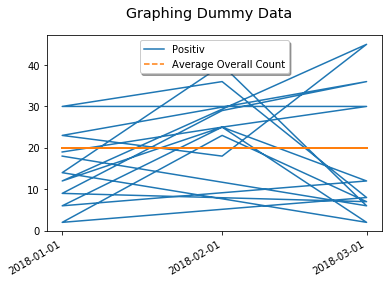

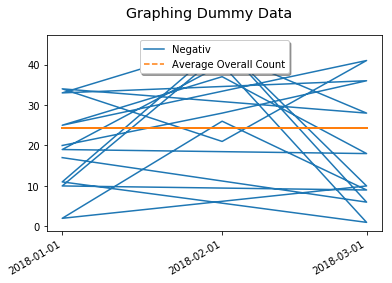

In [9]:
# Plot all the positiv and negativ of the dummy data
for columns in DummyDataframe[["Positiv", "Negativ"]]:
    # This is an example of not choosing to save the image
    basic_plot_generator(columns, "Graphing Dummy Data" ,DummyDataframe.index, DummyDataframe)

In [10]:
# Create a copy dataframe of the origin
DummyDataframe2 = DummyDataframe[["Tokens","Token_Count"]].copy()

# Collapse the dates
DummyDataframe2 = DummyDataframe2[["Tokens","Token_Count"]].groupby('Date').agg({'Tokens': 'sum', 'Token_Count': 'sum'})

# Showcase the new copy
DummyDataframe2

,Tokens,Token_Count
Date,,
2018-01-01,"[FURNISH, ASSURANCE, ANIMATE, WRITTEN, SANGUIN...",782
2018-02-01,"[COAX, SELF-DETERMINATION, SIGNATURE, IMPERATI...",1213
2018-03-01,"[PROVINCE, LAZY, SILLY, AMID, FUSS, BEWARE, RO...",619


Now we will run the functions again

In [11]:
# Apply the count function
DummyDataframe2 = DummyDataframe2.apply(lambda x: update_values_category(x, "Tokens"), axis=1)

# Seeing what DummyDataframe look like
DummyDataframe2

,Tokens,Token_Count,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,"[FURNISH, ASSURANCE, ANIMATE, WRITTEN, SANGUIN...",782,133,171,64,51,73,64,143,68,...,5,12,0,13,14,11,0,0,0,0
2018-02-01,"[COAX, SELF-DETERMINATION, SIGNATURE, IMPERATI...",1213,221,285,112,68,132,109,201,85,...,7,27,5,25,12,14,0,0,0,0
2018-03-01,"[PROVINCE, LAZY, SILLY, AMID, FUSS, BEWARE, RO...",619,146,149,67,35,62,41,116,48,...,2,6,1,13,5,9,0,0,0,0


Although we can showcase how to recreate the graph shown before, we will instead show how to convert the data into a percent. To do this we will create a function that will calculate the percent for us.

In [12]:
'''
Replaces the occurnace count with percentage

:dataframe:      The dataframe being used
:categoryList:  The categories that you are looking a
:tokenCount:     The amount of tokens total
'''
def calPercentage(dataframe, tokenCount, categoryList):
    
    # Loop through all categories and calculate percent
    for category in categoryList:
        # Calculate percent
        dataframe[category] = float("{0:.2f}".format(dataframe[category] / dataframe[tokenCount]  * 100))
    
    # Return dataframe
    return dataframe

Now that we have defined the function. Let's convert the first two categories "Postiv" and "Negativ" into percentages

In [13]:
# Apply the percent function
DummyDataframe2 = DummyDataframe2.apply(lambda x: calPercentage(x, "Token_Count", ["Positiv", "Negativ"]), axis=1)

# Seeing what DummyDataframe look like
DummyDataframe2

,Tokens,Token_Count,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,"[FURNISH, ASSURANCE, ANIMATE, WRITTEN, SANGUIN...",782,17.01,21.87,64,51,73,64,143,68,...,5,12,0,13,14,11,0,0,0,0
2018-02-01,"[COAX, SELF-DETERMINATION, SIGNATURE, IMPERATI...",1213,18.22,23.50,112,68,132,109,201,85,...,7,27,5,25,12,14,0,0,0,0
2018-03-01,"[PROVINCE, LAZY, SILLY, AMID, FUSS, BEWARE, RO...",619,23.59,24.07,67,35,62,41,116,48,...,2,6,1,13,5,9,0,0,0,0


Now you see that all the values in those columns have been converted into a percentage of all the tokens of that date. If we now plot the new graph we can see the percentage over time.

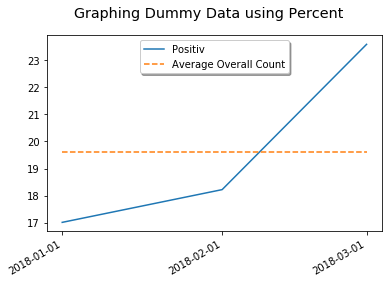

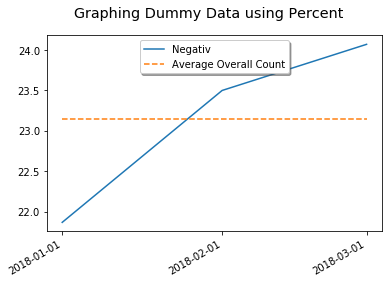

In [14]:
# Plot all the positiv and negativ of the dummy data
for columns in DummyDataframe2[["Positiv", "Negativ"]]:
    # This is an example of not choosing to save the image
    basic_plot_generator(columns, "Graphing Dummy Data using Percent" ,DummyDataframe2.index, DummyDataframe2)

## Conclusion

In this notebook we looked at the General Inquirer Category provided by Harvard. This document allows us to look at tweets differently by allowing us to sort words into a variety of different categories. Using Panda apply and lamda features we were able to calculate different aspects, such as percentage, from this information. 

Building upon different ideas and concepts discussed in other TATR series notebooks, we were able to ultilize them to conduct a more advance anaylsis.